In [51]:
import numpy as np
import math

# 気圧の係数
# 著者のgithubに上がっていた係数ファイル
original_coeff = np.load('/Users/naoto/STORM-preprocessing/COEFFICIENTS_JM_PRESSURE_author.npy', allow_pickle=True).item()
# original_coeff = original_coeff[5] # WPだけ抽出

# 著者と同じコードより生成した係数ファイル
repro_coeff = np.load('/Users/naoto/STORM-preprocessing/COEFFICIENTS_JM_PRESSURE.npy', allow_pickle=True).item()
# repro_coeff = repro_coeff[5] # WPだけ抽出


# 先頭行を追加
for month in range(5, 12):
    for i in range(16):
        repro_coeff[5][month].insert(0, repro_coeff[5][month][15])

np.save('COEFFICIENTS_JM_PRESSURE_add_first_line.npy', repro_coeff)


repro_coeff_add_first_line = np.load('/Users/naoto/STORM-preprocessing/COEFFICIENTS_JM_PRESSURE_add_first_line.npy', allow_pickle=True).item()

for i in range(6):
    print("index={}".format(i))
    # print(original_coeff[i] == repro_coeff_add_first_line[i])
    # print(len(original_coeff[i]), len(repro_coeff[i])) # 一致
    for j in original_coeff[i]:
        print("{}月".format(j))
        print(len(original_coeff[i][j]), len(repro_coeff[i][j])) # そもそものサイズが1行分異なることが判明

index=0
6月
252 231
7月
252 231
8月
252 231
9月
252 231
10月
252 231
11月
252 231
index=1
6月
252 231
7月
252 231
8月
252 231
9月
252 231
10月
252 231
11月
252 231
index=2
4月
168 154
5月
168 154
6月
168 154
9月
168 154
10月
168 154
11月
168 154
index=3
1月
300 275
2月
300 275
3月
300 275
4月
300 275
11月
300 275
12月
300 275
index=4
1月
252 231
2月
252 231
3月
252 231
4月
252 231
11月
252 231
12月
252 231
index=5
5月
192 192
6月
192 192
7月
192 192
8月
192 192
9月
192 192
10月
192 192
11月
192 192


114
82.3051948051948


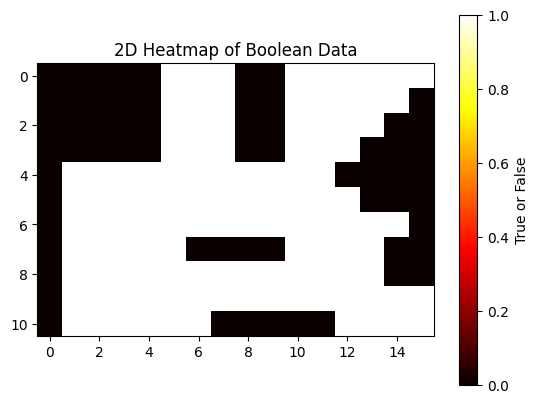

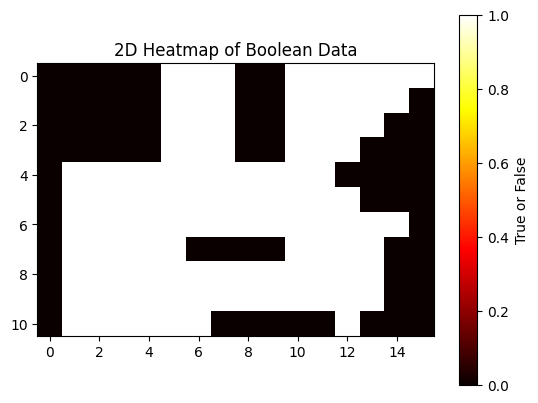

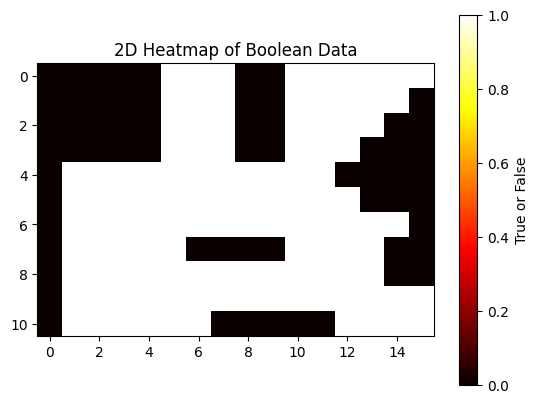

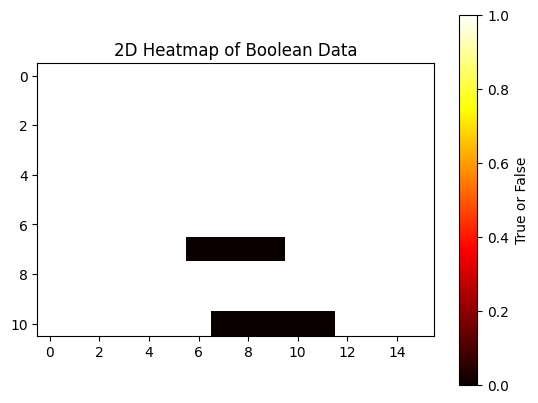

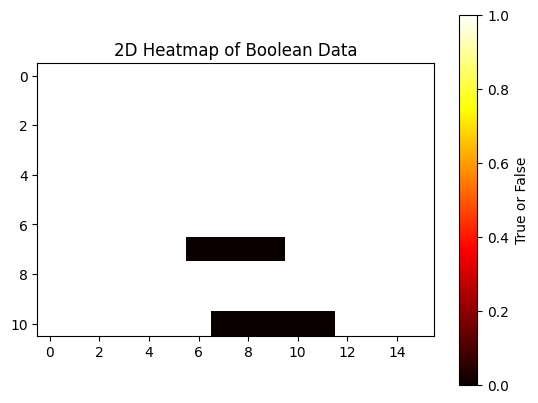

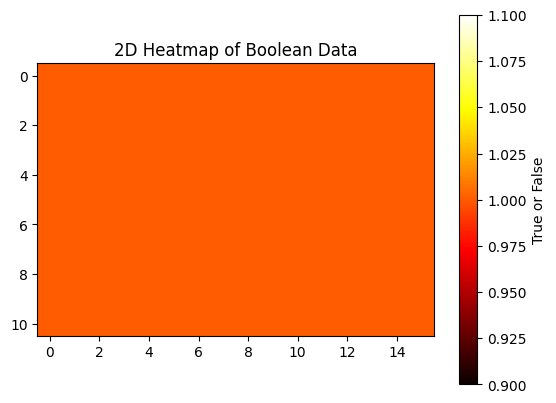

In [42]:
import math
import matplotlib.pyplot as plt
import numpy as np

# WPに限定して、検証
WP_IDX = 5
TRUE_CNT = 0

def isclose(A, B):
    global TRUE_CNT  # これによりTRUE_CNTをグローバル変数として扱う
    if math.isclose(A, B, rel_tol=0.01):
        TRUE_CNT += 1
        return True

    else:
        return False

# for month in repro_coeff[WP_IDX]:
#     for index in range(len(repro_coeff[WP_IDX][month])):
#         # print(index, "CO", abs(original_coeff[WP_IDX][month][index+16][0] - repro_coeff[WP_IDX][month][index][0]),
#         #              "C1", abs(original_coeff[WP_IDX][month][index+16][1] - repro_coeff[WP_IDX][month][index][1]),
#         #              "C2", abs(original_coeff[WP_IDX][month][index+16][2] - repro_coeff[WP_IDX][month][index][2]),
#         #              "C3", abs(original_coeff[WP_IDX][month][index+16][3] - repro_coeff[WP_IDX][month][index][3]),
#         #              "Emu", abs(original_coeff[WP_IDX][month][index+16][4] - repro_coeff[WP_IDX][month][index][4]),
#         #              "Estd", abs(original_coeff[WP_IDX][month][index+16][5] - repro_coeff[WP_IDX][month][index][5]),
#         #              "MPI", abs(original_coeff[WP_IDX][month][index+16][6] - repro_coeff[WP_IDX][month][index][6])
#         #     )
#         print(index, "CO", isclose(original_coeff[WP_IDX][month][index+16][0], repro_coeff[WP_IDX][month][index][0]),
#                      "C1", isclose(original_coeff[WP_IDX][month][index+16][1], repro_coeff[WP_IDX][month][index][1]),
#                      "C2", isclose(original_coeff[WP_IDX][month][index+16][2], repro_coeff[WP_IDX][month][index][2]),
#                      "C3", isclose(original_coeff[WP_IDX][month][index+16][3],repro_coeff[WP_IDX][month][index][3]),
#                      "Emu", isclose(original_coeff[WP_IDX][month][index+16][4],repro_coeff[WP_IDX][month][index][4]),
#                      "Estd", isclose(original_coeff[WP_IDX][month][index+16][5], repro_coeff[WP_IDX][month][index][5]),
#                      "MPI", isclose(original_coeff[WP_IDX][month][index+16][6], repro_coeff[WP_IDX][month][index][6])
#             )

# print((TRUE_CNT * 100) / (7 * 7 * 176))

MONTH = 8
coeff = []
for index in range(len(repro_coeff[WP_IDX][MONTH])):  # 176回ループ
    add_coeff = []  # ここに7つの要素のTrue/Falseを入れる
    for j_idx in range(7):
        if isclose(original_coeff[WP_IDX][MONTH][index+16][j_idx], repro_coeff[WP_IDX][MONTH][index][j_idx]):
            add_coeff.append(True)
        else:
            add_coeff.append(False)
        
    coeff.append(add_coeff)

c0 = []
c1 = []
c2 = []
c3 = []
emu = []
estd = []
mpi = []

for i in range(len(coeff)):
    c0.append(coeff[i][0])
    c1.append(coeff[i][1])
    c2.append(coeff[i][2])
    c3.append(coeff[i][3])
    emu.append(coeff[i][4])
    estd.append(coeff[i][5])
    mpi.append(coeff[i][6])

c0 = np.flipud(np.array(c0).reshape(11, 16))
c1 = np.flipud(np.array(c1).reshape(11, 16))
c2 = np.flipud(np.array(c2).reshape(11, 16))
c3 = np.flipud(np.array(c3).reshape(11, 16))
emu = np.flipud(np.array(emu).reshape(11, 16))
estd = np.flipud(np.array(estd).reshape(11, 16))
mpi = np.flipud(np.array(mpi).reshape(11, 16))

print(np.sum(c0))
TRUE_CNT = np.sum(c0) + np.sum(c1) + np.sum(c2) + np.sum(c3) + np.sum(emu) + np.sum(estd) + np.sum(mpi)
print(TRUE_CNT * 100 / (7 * 176))

# # 2次元ヒートマップを描画
for val in [c0, c2, c3, emu, estd, mpi]:
    plt.imshow(val, cmap='hot', interpolation='nearest')
    plt.colorbar(label='True or False')
    plt.title('2D Heatmap of Boolean Data')
    plt.show()

# fig, axs = plt.subplots(3, 3, figsize=(20, 3))  # 1行7列のサブプロットを作成
# for ax in axs:
#     # 各サブプロットにヒートマップを描画
#     im = ax.imshow(c0, cmap='hot', interpolation='nearest')

# # カラーバーを追加
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.95)
# cbar.set_label('True or False')

# # タイトルを追加
# plt.suptitle('2D Heatmaps of Boolean Data')

# # プロットの表示
# plt.show()

In [ ]:
!pip3 install matplotlib